#       Deep learning with Text Mininig    
##                    Rennes School of Business
##                      Project
####      
                               2022



For this task, you need to use tweet data for forcasting stock price.
The file Amazon.csv contains informaion on Tweets about Amazon stock from 2015 until 2020. For this task is to forecast stock price or return of Amazon with and woutout tweet data by applying deep learning model. You should find optimum configuration of deep learning with grid search.


##Students name 	  Student No.
Ricardo aaron	GUEVARA MATA 	      20210589
Ming Chieh	KUO 	                20210281
Luis Manuel	GONZALEZ GUERRERO 	  20210588
Rina	RABEMANANTSOA 	            20191860
Dorsaf	Ben saad 	                20211781     

##Group: Group 4

##To hand in
###Guidelines for report layout





# Section 1 Stentiment analysis of tweets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/DriveUploader/Amazon.csv')
df.head(5)

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,3,5.504417e+17,AMZN,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
1,27,5.504479e+17,AMZN,JorelLaraKalel,1420071969,Top 10 searched #stocks of #2014 $AAPL $FB $BA...,0,0,2
2,38,5.504532e+17,AMZN,jakubhajost,1420073237,RT @SeekingAlpha: A Look At BlackBerry's Deals...,0,0,0
3,39,5.504536e+17,AMZN,WSJ,1420073345,Jeff Bezos lost $7.4 billion in Amazon's worst...,21,139,57
4,40,5.504539e+17,AMZN,GillesKLEIN,1420073410,Jeff Bezos lost $7.4 billion in #Amazon worst ...,1,2,1


In [ ]:
sentence = "i really like you but you can be so dumb some times"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718867 entries, 0 to 718866
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     718867 non-null  int64  
 1   tweet_id       718867 non-null  float64
 2   ticker_symbol  718867 non-null  object 
 3   writer         709344 non-null  object 
 4   post_date      718867 non-null  int64  
 5   body           718867 non-null  object 
 6   comment_num    718867 non-null  int64  
 7   retweet_num    718867 non-null  int64  
 8   like_num       718867 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 49.4+ MB


In [ ]:
pip install pysentiment2

     |████████████████████████████████| 1.9 MB 2.6 MB/s 


In [ ]:
import pysentiment2 as ps
# Do something with pysentiment2

In [ ]:
def myhiv4sentiment (Data):
    hiv4sentiment = []
    hiv4 = ps.HIV4()
    for a in Data:
        tokens = hiv4.tokenize(a)
        scorehiv4 = hiv4.get_score(tokens)
        hiv4sentiment.append(scorehiv4)

    return hiv4sentiment


In [ ]:
def myscorelmsentiment (Data):
    lmsentiment = []
    lm = ps.LM()
    for a in Data:
        tokens = lm.tokenize(a)
        scorelm = lm.get_score(tokens)
        lmsentiment.append(scorelm)

    return lmsentiment

In [ ]:
df.head

<bound method NDFrame.head of         Unnamed: 0      tweet_id ticker_symbol           writer   post_date  \
0                3  5.504417e+17          AMZN      DozenStocks  1420070510   
1               27  5.504479e+17          AMZN   JorelLaraKalel  1420071969   
2               38  5.504532e+17          AMZN      jakubhajost  1420073237   
3               39  5.504536e+17          AMZN              WSJ  1420073345   
4               40  5.504539e+17          AMZN      GillesKLEIN  1420073410   
...            ...           ...           ...              ...         ...   
718862     4338739  1.212154e+18          AMZN         thequ4nt  1577835088   
718863     4338745  1.212155e+18          AMZN  DentonBlackwell  1577835301   
718864     4338749  1.212157e+18          AMZN        ITRADEVOL  1577835670   
718865     4338751  1.212157e+18          AMZN     naashonomics  1577835806   
718866     4338752  1.212158e+18          AMZN              NaN  1577835888   

                     

In [ ]:
hiv4sentiment_score= pd.DataFrame.from_records(myhiv4sentiment(df['body']))
hiv4sentiment_score.columns = ['hiv4Positive'	,'hiv4Negative'	,'hiv4Polarity',	'hiv4Subjectivity']
df = df.join(hiv4sentiment_score)

In [ ]:
lmsentiment_score= pd.DataFrame.from_records(myscorelmsentiment(df['body']))
lmsentiment_score.columns = ['LMPositive'	,'LMNegative'	,'LMPolarity',	'LMSubjectivity']
df = df.join(lmsentiment_score)

In [ ]:
df.head(5)

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,hiv4Positive,hiv4Negative,hiv4Polarity,hiv4Subjectivity,LMPositive,LMNegative,LMPolarity,LMSubjectivity
0,3,5.504417e+17,AMZN,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,27,5.504479e+17,AMZN,JorelLaraKalel,1420071969,Top 10 searched #stocks of #2014 $AAPL $FB $BA...,0,0,2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,38,5.504532e+17,AMZN,jakubhajost,1420073237,RT @SeekingAlpha: A Look At BlackBerry's Deals...,0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,39,5.504536e+17,AMZN,WSJ,1420073345,Jeff Bezos lost $7.4 billion in Amazon's worst...,21,139,57,0.0,2.0,-1.0,0.181818,0.0,2.0,-1.0,0.181818
4,40,5.504539e+17,AMZN,GillesKLEIN,1420073410,Jeff Bezos lost $7.4 billion in #Amazon worst ...,1,2,1,0.0,2.0,-1.0,0.181818,0.0,2.0,-1.0,0.181818


In [ ]:
import datetime
df['Date'] = pd.to_datetime(df['post_date'],unit='s').dt.strftime('%Y-%m-%d')

In [ ]:
df = df.sort_values(by="Date")

In [ ]:
df.tail(500)

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,hiv4Positive,hiv4Negative,hiv4Polarity,hiv4Subjectivity,LMPositive,LMNegative,LMPolarity,LMSubjectivity,Date
718058,4334110,1.211668e+18,AMZN,StockRecycler,1577719144,Some $AMZN feelers long. Small size. Will add ...,1,0,0,1.0,0.0,0.999999,0.200000,0.0,0.0,0.000000,0.000000,2019-12-30
718057,4334108,1.211668e+18,AMZN,emptyboxguru,1577719138,$IBM aka $AMZN road kill has a date with the c...,0,0,1,0.0,1.0,-0.999999,0.166667,0.0,0.0,0.000000,0.000000,2019-12-30
718056,4334106,1.211668e+18,AMZN,CheddarFlow,1577719100,$AMZN call sweep478 Jan(17) 1915 calls opened ...,0,4,3,2.0,0.0,1.000000,0.333333,0.0,0.0,0.000000,0.000000,2019-12-30
718055,4334104,1.211668e+18,AMZN,Steve_C_Shirley,1577719092,Did okay this morning with my weekend carry ov...,0,0,1,0.0,1.0,-0.999999,0.055556,0.0,0.0,0.000000,0.000000,2019-12-30
718054,4334100,1.211668e+18,AMZN,InvincibleBull,1577719080,"@OptionsMike $GME huge company share buyback, ...",1,0,1,2.0,1.0,0.333333,0.088235,0.0,1.0,-0.999999,0.029412,2019-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718544,4337134,1.212023e+18,AMZN,ShortDaPos,1577803677,Added $AMZN calls scalped a few & holding rest...,0,0,1,1.0,0.0,0.999999,0.200000,0.0,0.0,0.000000,0.000000,2019-12-31
718543,4337132,1.212023e+18,AMZN,Roka_Dura,1577803676,$AMZN long call,0,0,1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2019-12-31
718542,4337128,1.212022e+18,AMZN,dards21,1577803598,"1/5, wont quit my day job.Nailed Mariano.$AMZN...",1,0,3,1.0,2.0,-0.333333,0.166667,0.0,2.0,-1.000000,0.111111,2019-12-31
718554,4337190,1.212025e+18,AMZN,ChoZynTradeZ,1577804270,Perfect example of market right now $SPY $AAPL...,0,0,1,2.0,0.0,1.000000,0.222222,1.0,0.0,0.999999,0.111111,2019-12-31


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Group by date and ticker columns from scored_news and calculate the mean
mean_c = df.groupby(['Date']).mean()

In [ ]:
mean_c = mean_c.sort_values(by="Date")

In [ ]:
mean_c.tail(5)

,Unnamed: 0,tweet_id,post_date,comment_num,retweet_num,like_num,hiv4Positive,hiv4Negative,hiv4Polarity,hiv4Subjectivity,LMPositive,LMNegative,LMPolarity,LMSubjectivity
Date,,,,,,,,,,,,,,
31-12-2015,8.376671e+05,6.825690e+17,1.451572e+09,0.081535,0.565947,0.633094,0.757794,0.345324,0.260671,0.095531,0.093525,0.112710,-0.007194,0.020423
31-12-2016,1.787725e+06,8.151596e+17,1.483184e+09,0.067797,0.401130,0.610169,0.796610,0.627119,0.077401,0.120305,0.146893,0.231638,-0.045198,0.028135
31-12-2017,2.518745e+06,9.474425e+17,1.514723e+09,0.238411,0.629139,1.874172,1.178808,0.476821,0.237528,0.111893,0.245033,0.211921,0.028256,0.025488
31-12-2018,3.432711e+06,1.079801e+18,1.546279e+09,0.365019,0.669202,2.129278,1.087452,0.673004,0.180889,0.139531,0.220532,0.365019,-0.093283,0.046423
31-12-2019,4.337516e+06,1.212027e+18,1.577805e+09,0.335443,0.487342,2.158228,1.392405,0.822785,0.194916,0.151084,0.248945,0.276371,-0.019128,0.035789


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Group by date and ticker columns from scored_news and calculate the mean
mean_c = df.groupby(['Date']).count()
mean_c = mean_c.sort_values(by="Date")

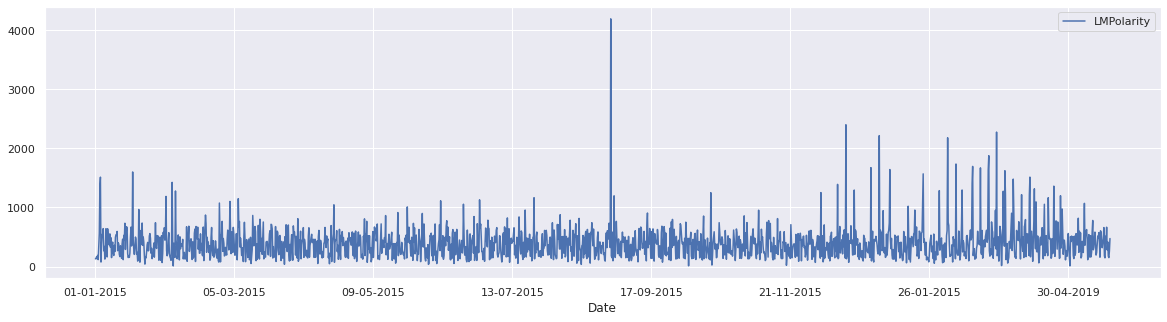

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Group by date and ticker columns from scored_news and calculate the count
df_count = df.groupby(['Date']).count()
# Get the cross-section of compound in the 'columns' axis
df_count_col = pd.DataFrame(df_count.xs('LMPolarity', axis='columns'))
# Plot a bar chart with pandas

df_count_col.plot( figsize=(20,5))

In [ ]:
date,
#df_count_col['Date']=df_count_col.index
df_count_col=df_count_col.reset_index()
date
df_count_col = df_count_col.sort_values(by="Date")

In [ ]:
df_count_col

,Date,LMPolarity
0,01-01-2015,131
1,01-01-2016,132
2,01-01-2017,164
3,01-01-2018,136
4,01-01-2019,189
...,...,...
1821,31-12-2015,417
1822,31-12-2016,177
1823,31-12-2017,151
1824,31-12-2018,263


In [ ]:
# Plot time series the close price and volume of stock price
# Question 3: Explain the time series plots and try to identify important events

fig=go.Figure(data=[go.Scatter(name = 'Close',x= df_count_col.Date,y= df_count_col.LMPolarity)])
fig.update_layout(title="Closing stock's price of Boeing 1966-2021",xaxis_title="Date", yaxis_title="Price (in $)")
fig.show()


## Question

Use Loughran and McDonald Financial Sentiment Dictionaries for  the follwing questions

Plot time series of the daily average of the number of tweets


Plot time series of the daily average of sentiment score of tweets

Plot time series of the daily average of positive score of tweets

Plot time series of the daily average of negative score of tweets

Plot time series of the daily average of subjectivity score of tweets

Explain each plot briefly



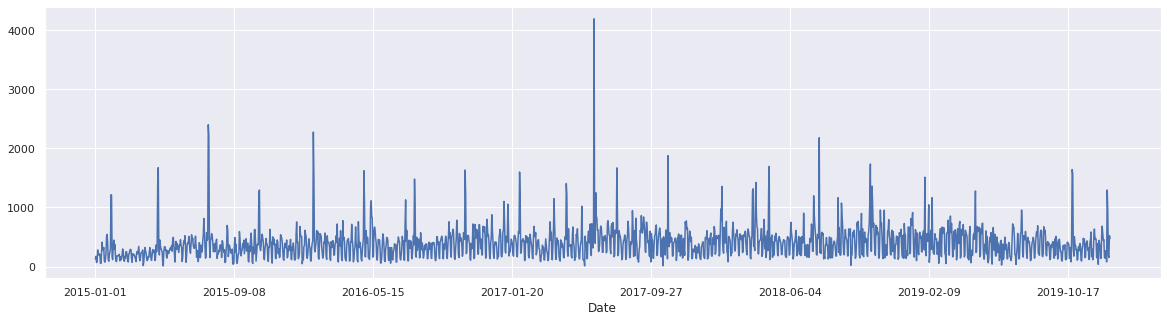

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

count_c = df.groupby(['Date']).count()


# Get the cross-section of compound in the 'columns' axis
count_col = count_c.xs('LMPolarity', axis='columns')

count_col.plot( figsize=(20,5))

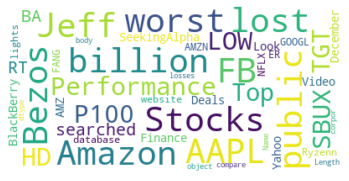

In [ ]:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
% matplotlib inline

wordcloud = WordCloud(max_font_size=40, max_words=1000, background_color="white",stopwords=STOPWORDS).generate(str(df['body']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

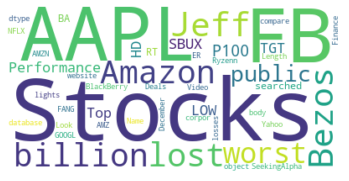

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["year", "now"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(df['body']))

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
### Question 1
 #Plot WordCloud of stopwords
# prof. has done!!!
 #Plot WordCloud of NOUN
## extract all the word from datafram
a=list(df['body'])




NameError: ignored

In [ ]:
import nltk
nltk.download('universal_tagset')
from collections import defaultdict

POS_dict = defaultdict(dict)

tagger_dict = {}
for word in POS_dict:
    tagger_dict[word] = max(POS_dict[word],key=lambda x: POS_dict[word][x])

def tag(sentence):
    return [(word,tagger_dict.get(word,"NN")) for word in sentence]



In [ ]:
# creat type lists
nouns = ['NN', 'NNP','NNS']
verbs = ['VB','VBD','VBG','VBN','VBP','VBZ']
adjectives = ['JJ','JJR','JJS']

for i in df['body']:

  for noun in nouns:
    noun_list = tag(df['body'])



 #Plot WordCloud of PROPN

 #Plot WordCloud of VERB

In [ ]:
pip install spacy

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
doc = nlp(str(df['body']))
doc

0         S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...
1         Top 10 searched #stocks of #2014 $AAPL $FB $BA...
2         RT @SeekingAlpha: A Look At BlackBerry's Deals...
3         Jeff Bezos lost $7.4 billion in Amazon's worst...
4         Jeff Bezos lost $7.4 billion in #Amazon worst ...
                                ...                        
718862    [Yahoo Finance Video - December 31, 2019] $AMZ...
718863    @Ryzenn $AAPL has to have a lights out ER to k...
718864    Is there a public database or website where I ...
718865                    $FB $AMZN $GOOGL $NFLX #FANG 2019
718866    When you compare the losses of a public corpor...
Name: body, Length: 718867, dtype: object

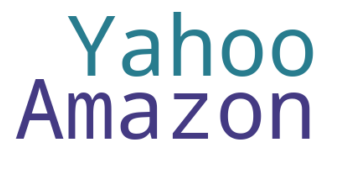

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
a = [ent[0] for ent in doc.ents if ent.label_ == 'ORG']
aa=str(a).strip('[]')
wordcloud = WordCloud(stopwords=stopwords,max_font_size=100, max_words=1000, background_color="white").generate(aa)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##  Download history data from yahoo finance

Please select the symbol of stock from this list

* Group.   Symbol | Company
2.   AMZN | Amazon.com


In [ ]:
# The first the step is to download history data from yahoo finance.
# Install yahoo finance package

In [ ]:
pip install yfinance

In [ ]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import pandas as pd
import plotly.graph_objs as go

import statsmodels as sm
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

import yfinance as yf

from sklearn.preprocessing import MinMaxScaler

import re
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense, Input, Dropout
from keras import Sequential
from keras.models import Sequential
from keras.layers import LSTM

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
MyTicker = yf.Ticker("AMZN")

In [ ]:
print(MyTicker.info)
## More options: https://github.com/ranaroussi/yfinance

{'zip': '98109-5210', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 1608000, 'longBusinessSummary': 'Amazon.com, Inc. engages in the retail sale of consumer products and subscriptions in North America and internationally. The company operates through three segments: North America, International, and Amazon Web Services (AWS). It sells merchandise and content purchased for resale from third-party sellers through physical and online stores. The company also manufactures and sells electronic devices, including Kindle, Fire tablets, Fire TVs, Rings, and Echo and other devices; provides Kindle Direct Publishing, an online service that allows independent authors and publishers to make their books available in the Kindle Store; and develops and produces media content. In addition, it offers programs that enable sellers to sell their products on its websites, as well as its stores; and programs that allow authors, musicians, filmmakers, Twitch streamers, skill and app developers, and oth

In [ ]:
# get historical market data from yahoo finance
data_s = MyTicker.history(period="max")
#data_s['Date'] = data_s.index
data_s=data_s.reset_index()

In [ ]:
data_s

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000,0,0.0
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000,0,0.0
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800,0,0.0
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200,0,0.0
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200,0,0.0
...,...,...,...,...,...,...,...,...
6234,2022-02-22,3009.570068,3059.649902,2969.709961,3003.949951,3306400,0,0.0
6235,2022-02-23,3033.010010,3035.260010,2893.020020,2896.540039,3212200,0,0.0
6236,2022-02-24,2796.750000,3034.979980,2790.000000,3027.159912,5039300,0,0.0
6237,2022-02-25,3011.000000,3079.800049,2984.270020,3075.770020,3117000,0,0.0


In [ ]:
# Question 2: check data and provide statistical description of stock price, Explain?
import pandas as pd
pd.set_option('display.max_columns', 500) # To be able to see all the columns of the describe method
print(data_s.describe())
data_s.head(5)

              Open         High          Low        Close        Volume  \
count  6239.000000  6239.000000  6239.000000  6239.000000  6.239000e+03   
mean    557.921763   564.141061   551.058945   557.740117  7.280761e+06   
std     909.860104   919.573762   898.940472   909.232765  7.116010e+06   
min       1.406250     1.447917     1.312500     1.395833  4.872000e+05   
25%      38.985001    39.720001    38.311251    39.014999  3.539000e+06   
50%      96.589996   100.437500    94.699997    96.750000  5.432900e+06   
75%     577.525024   583.774994   569.940002   577.255005  8.248450e+06   
max    3744.000000  3773.080078  3696.790039  3731.409912  1.043292e+08   

       Dividends  Stock Splits  
count     6239.0   6239.000000  
mean         0.0      0.001122  
std          0.0      0.052192  
min          0.0      0.000000  
25%          0.0      0.000000  
50%          0.0      0.000000  
75%          0.0      0.000000  
max          0.0      3.000000  


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000,0,0.0
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000,0,0.0
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800,0,0.0
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200,0,0.0
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200,0,0.0


## Analysis of time series of Stock Price

In [ ]:
# Extracting Date, Open, High, Low and Close from the Dataframe.
data = data_s[['Date','Close','Open', 'High', 'Low','Volume']]

In [ ]:
# Plot time series the close price and volume of stock price
# Question 3: Explain the time series plots and try to identify important events

fig=go.Figure(data=[go.Scatter(name = 'Close',x= data['Date'],y= data['Close'])])
fig.update_layout(title="Closing stock's price of Boeing 1966-2021",xaxis_title="Date", yaxis_title="Price (in $)")
fig.show()

fig=go.Figure(data=[go.Scatter(name = 'Volume',x= data['Date'],y= data['Volume'])])
fig.update_layout(title="Volume of Boeing's stock 1966-2021",xaxis_title="Date", yaxis_title="Volume")
fig.show()


In [ ]:
# Extracting Date and Close from the Dataframe.
data_extr = data_s[['Date','Close']]
df_extr = df[['comment_num'	,'retweet_num',	'like_num',	'Date',	'hiv4Positive',	'hiv4Negative',	'hiv4Polarity',	'hiv4Subjectivity',	'LMPositive',	'LMNegative',	'LMPolarity',	'LMSubjectivity']]

In [ ]:
mean_c = df_extr.groupby(['Date']).mean()
mean_c=mean_c.reset_index()
mean_c['Date'] = pd.to_datetime(mean_c.Date)
mean_c['Date'] = mean_c['Date'].dt.strftime('%Y-%m-%d')
mean_c['Date'] = mean_c['Date'].astype(str)
data_extr['Date'] = data_extr['Date'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
Final=mean_c.join(data_extr.set_index('Date'), on = 'Date')
Final.dropna(inplace=True)

In [ ]:
Final.head

<bound method NDFrame.head of             Date  comment_num  retweet_num  like_num  hiv4Positive  \
1     2015-01-02     0.063218     2.166667  0.528736      0.885057   
4     2015-01-05     0.049822     0.188612  0.451957      0.494662   
5     2015-01-06     0.053398     0.325243  0.674757      0.922330   
6     2015-01-07     0.041237     0.195876  0.855670      0.737113   
7     2015-01-08     0.120930     0.190698  0.502326      0.730233   
...          ...          ...          ...       ...           ...   
1818  2019-12-24     0.286920     0.582278  1.902954      1.443038   
1820  2019-12-26     0.451389     0.556327  3.490741      1.111111   
1821  2019-12-27     0.445378     0.667017  3.778361      1.344538   
1824  2019-12-30     0.265774     0.489484  2.564054      1.514340   
1825  2019-12-31     0.335443     0.487342  2.158228      1.392405   

      hiv4Negative  hiv4Polarity  hiv4Subjectivity  LMPositive  LMNegative  \
1         0.729885      0.078051          0.140676 

In [ ]:
# run this function to split dataset. Explain how this function split financial data set. Why we cannot split financial
# time seires to train and test randomly?

def Split_Train_Test(data, test_ratio):
    '''splits data into a training and testing set'''
    train_set_size = 1 - int(len(data) * test_ratio)
    train_set = data[:train_set_size]
    test_set = data[train_set_size:]
    return train_set, test_set

In [ ]:
dataset_foranalysis=Final.drop(['Date'], axis=1)
# use above function to split data to (30%-70%).
train, test = Split_Train_Test(dataset_foranalysis, 0.3)

In [ ]:
lags = range(1, 5)  # Just two lags for demonstration.

train_XX=train.loc[:, train.columns != 'Close']
train_XXlag=train_XX.assign(**{
  f'{col} (t-{lag})': train_XX[col].shift(lag)
  for lag in lags
  for col in train_XX
  })
Y_train = train["Close"]
Y_train.drop(Y_train.head(5).index,inplace=True) # drop last n rows
train_XXlag.drop(train_XXlag.head(5).index,inplace=True) # drop last n rows


test_XX=test.loc[:, test.columns != 'Close']
test_XXlag=test_XX.assign(**{
  f'{col} (t-{lag})': test_XX[col].shift(lag)
  for lag in lags
  for col in test_XX
  })

Y_test = test["Close"]
Y_test.drop(Y_test.head(5).index,inplace=True) # drop last n rows
test_XXlag.drop(test_XXlag.head(5).index,inplace=True) # drop last n rows


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4153: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train_XX=train.loc[:, train.columns != 'Close']
X_train=pd.concat([train_XX.shift(1),train_XX.shift(2),train_XX.shift(3),train_XX.shift(4),train_XX.shift(5)], axis=1).dropna()

Y_train = train["Close"]
Y_train.drop(Y_train.head(5).index,inplace=True) # drop last n rows

#####################
### test
test_XX=test.loc[:, test.columns != 'Close']
#X_test=pd.concat([test.shift(1)], axis=1).dropna()
X_test=pd.concat([test_XX.shift(1),test_XX.shift(2),test_XX.shift(3),test_XX.shift(4),test_XX.shift(5)], axis=1).dropna()

Y_test = test["Close"]
Y_test.drop(Y_test.head(5).index,inplace=True) # drop last n rows

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4153: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
test_XXlag.head(2)

,comment_num,retweet_num,like_num,hiv4Positive,hiv4Negative,hiv4Polarity,hiv4Subjectivity,LMPositive,LMNegative,LMPolarity,LMSubjectivity,comment_num (t-1),retweet_num (t-1),like_num (t-1),hiv4Positive (t-1),hiv4Negative (t-1),hiv4Polarity (t-1),hiv4Subjectivity (t-1),LMPositive (t-1),LMNegative (t-1),LMPolarity (t-1),LMSubjectivity (t-1),comment_num (t-2),retweet_num (t-2),like_num (t-2),hiv4Positive (t-2),hiv4Negative (t-2),hiv4Polarity (t-2),hiv4Subjectivity (t-2),LMPositive (t-2),LMNegative (t-2),LMPolarity (t-2),LMSubjectivity (t-2),comment_num (t-3),retweet_num (t-3),like_num (t-3),hiv4Positive (t-3),hiv4Negative (t-3),hiv4Polarity (t-3),hiv4Subjectivity (t-3),LMPositive (t-3),LMNegative (t-3),LMPolarity (t-3),LMSubjectivity (t-3),comment_num (t-4),retweet_num (t-4),like_num (t-4),hiv4Positive (t-4),hiv4Negative (t-4),hiv4Polarity (t-4),hiv4Subjectivity (t-4),LMPositive (t-4),LMNegative (t-4),LMPolarity (t-4),LMSubjectivity (t-4)
1288,0.4375,0.831944,3.080556,1.180556,0.605556,0.254183,0.147247,0.237500,0.275000,-0.011806,0.040935,0.258661,0.401848,1.120092,1.254042,0.655889,0.222009,0.138964,0.212471,0.272517,-0.023557,0.030956,0.240385,0.528846,1.790865,1.346154,0.632212,0.272913,0.133693,0.223558,0.274038,-0.012019,0.035129,0.212185,0.474790,1.638655,1.388655,0.707983,0.249138,0.140552,0.218487,0.273109,-0.015056,0.029891,0.258721,0.584302,1.610465,1.287791,0.668605,0.222977,0.127483,0.313953,0.296512,-0.014583,0.038288
1289,0.3125,0.794207,2.478659,1.307927,0.679878,0.238855,0.160254,0.266768,0.294207,-0.014228,0.042309,0.437500,0.831944,3.080556,1.180556,0.605556,0.254183,0.147247,0.237500,0.275000,-0.011806,0.040935,0.258661,0.401848,1.120092,1.254042,0.655889,0.222009,0.138964,0.212471,0.272517,-0.023557,0.030956,0.240385,0.528846,1.790865,1.346154,0.632212,0.272913,0.133693,0.223558,0.274038,-0.012019,0.035129,0.212185,0.474790,1.638655,1.388655,0.707983,0.249138,0.140552,0.218487,0.273109,-0.015056,0.029891


# 6 Deep learning model with LSTM

In [ ]:
print(train_XXlag.shape, train_XXlag.shape)
print(Y_train.shape, Y_test.shape)

(877, 55) (877, 55)
(877,) (371,)


In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(train_XXlag.shape[1], 1), return_sequences=True))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 55, 100)           40800     
                                                                 
 dense (Dense)               (None, 55, 1)             101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#history_linear = model.fit(train_XXlag,Y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)
history_linear = model.fit(train_XXlag,Y_train, batch_size=64, epochs=100, verbose=1, validation_data=(test_XXlag, Y_test))


Epoch 1/100
14/14 [==============================] - 6s 104ms/step - loss: 816800.0625 - accuracy: 0.0000e+00 - val_loss: 3198043.5000 - val_accuracy: 0.0000e+00
Epoch 2/100
14/14 [==============================] - 1s 72ms/step - loss: 816357.3750 - accuracy: 0.0000e+00 - val_loss: 3196809.7500 - val_accuracy: 0.0000e+00
Epoch 3/100
14/14 [==============================] - 1s 75ms/step - loss: 816095.0625 - accuracy: 0.0000e+00 - val_loss: 3196740.2500 - val_accuracy: 0.0000e+00
Epoch 4/100
14/14 [==============================] - 1s 90ms/step - loss: 816071.9375 - accuracy: 0.0000e+00 - val_loss: 3196719.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
14/14 [==============================] - 1s 73ms/step - loss: 816062.6250 - accuracy: 0.0000e+00 - val_loss: 3196706.2500 - val_accuracy: 0.0000e+00
Epoch 6/100
14/14 [==============================] - 1s 73ms/step - loss: 816056.5000 - accuracy: 0.0000e+00 - val_loss: 3196696.5000 - val_accuracy: 0.0000e+00
Epoch 7/100
14/14 [==============

In [ ]:
p_test = model.predict(X_test)